In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
senior_df = pd.read_csv("노인실태조사.csv")
senior_df = senior_df[['RES_AGE', 'RES_MAR', 'S5_1', 'RES_EDU1', 'H16_2', 'H16_7', 'E5_1']]
senior_df.columns = ['연령', '혼인상태', '동거인수', '교육수준', '경제상태 만족도', '삶 만족도', 'target']
senior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10097 entries, 0 to 10096
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   연령        10097 non-null  int64
 1   혼인상태      10097 non-null  int64
 2   동거인수      10097 non-null  int64
 3   교육수준      10097 non-null  int64
 4   경제상태 만족도  10097 non-null  int64
 5   삶 만족도     10097 non-null  int64
 6   target    10097 non-null  int64
dtypes: int64(7)
memory usage: 552.3 KB


#### 데이터 전처리

In [ ]:
senior_df.isnull().sum()

연령          0
혼인상태        0
동거인수        0
교육수준        0
경제상태 만족도    0
삶 만족도       0
target      0
dtype: int64

In [ ]:
# 노인실태조사 : 9 는 결측치

d_index = senior_df[senior_df["연령"]==999].index
senior_df.drop(d_index, inplace=True)

d_index = senior_df[senior_df["혼인상태"]==9].index
senior_df.drop(d_index, inplace=True)

d_index = senior_df[senior_df["교육수준"]==9].index
senior_df.drop(d_index, inplace=True)

d_index = senior_df[senior_df["경제상태 만족도"]==9].index
senior_df.drop(d_index, inplace=True)

d_index = senior_df[senior_df["삶 만족도"]==9].index
senior_df.drop(d_index, inplace=True)

d_index = senior_df[senior_df["target"]==9].index
senior_df.drop(d_index, inplace=True)

senior_df.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2093 entries, 0 to 10071
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   연령        2093 non-null   int64
 1   혼인상태      2093 non-null   int64
 2   동거인수      2093 non-null   int64
 3   교육수준      2093 non-null   int64
 4   경제상태 만족도  2093 non-null   int64
 5   삶 만족도     2093 non-null   int64
 6   target    2093 non-null   int64
dtypes: int64(7)
memory usage: 130.8 KB


In [ ]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

import warnings
warnings.filterwarnings('ignore')

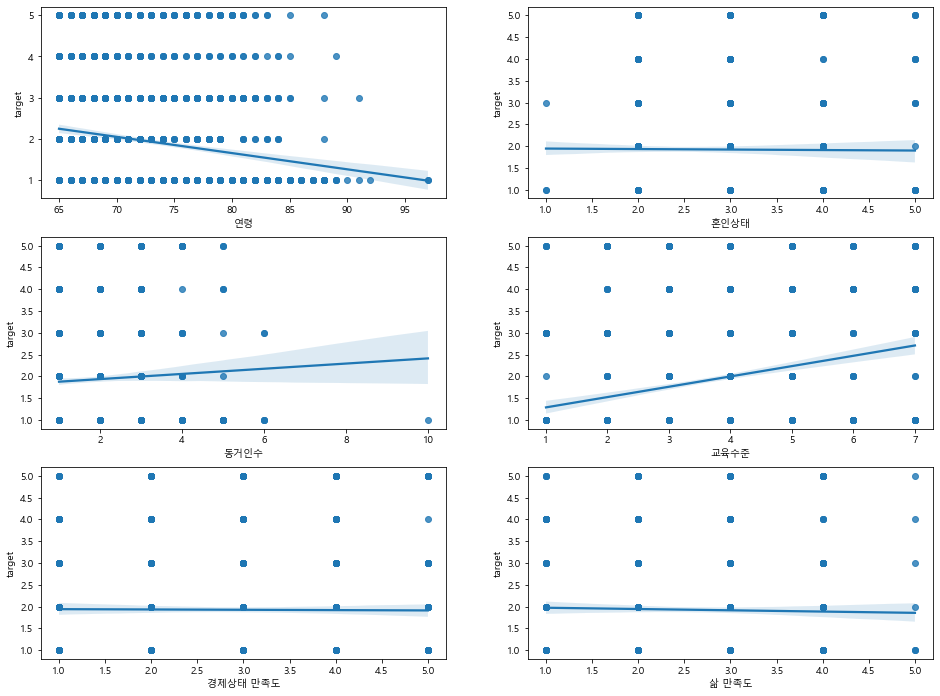

In [ ]:
_, axs = plt.subplots(3, 2, figsize=(16, 12))
for idx, feature in enumerate(senior_df.columns[:-1]):
    row, col = idx // 2, idx % 2 # 4로 나눈 몫과 나머지
    sns.regplot(x=feature, y=senior_df['target'], data=senior_df, ax=axs[row][col])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
for feature in senior_df.columns[:-1]:
    lr = LinearRegression()
    X = senior_df[feature].values.reshape(-1,1)
    lr.fit(X, senior_df.target)
    score = lr.score(X, senior_df.target)
    print(f"{feature}:\t{score:.4f}")

연령:	0.0267
혼인상태:	0.0000
동거인수:	0.0013
교육수준:	0.0402
경제상태 만족도:	0.0000
삶 만족도:	0.0002


#### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X=senior_df.iloc[:,:-1]
y=senior_df.iloc[:,-1]

poly_features = PolynomialFeatures(degree=6, include_bias=False)
X_poly = poly_features.fit_transform(X)

print('변환된 6차 다항식 계수 피처 : ',X_poly[0])

변환된 6차 다항식 계수 피처 :  [6.70000000e+01 1.00000000e+00 4.00000000e+00 2.00000000e+00
 1.00000000e+00 3.00000000e+00 4.48900000e+03 6.70000000e+01
 2.68000000e+02 1.34000000e+02 6.70000000e+01 2.01000000e+02
 1.00000000e+00 4.00000000e+00 2.00000000e+00 1.00000000e+00
 3.00000000e+00 1.60000000e+01 8.00000000e+00 4.00000000e+00
 1.20000000e+01 4.00000000e+00 2.00000000e+00 6.00000000e+00
 1.00000000e+00 3.00000000e+00 9.00000000e+00 3.00763000e+05
 4.48900000e+03 1.79560000e+04 8.97800000e+03 4.48900000e+03
 1.34670000e+04 6.70000000e+01 2.68000000e+02 1.34000000e+02
 6.70000000e+01 2.01000000e+02 1.07200000e+03 5.36000000e+02
 2.68000000e+02 8.04000000e+02 2.68000000e+02 1.34000000e+02
 4.02000000e+02 6.70000000e+01 2.01000000e+02 6.03000000e+02
 1.00000000e+00 4.00000000e+00 2.00000000e+00 1.00000000e+00
 3.00000000e+00 1.60000000e+01 8.00000000e+00 4.00000000e+00
 1.20000000e+01 4.00000000e+00 2.00000000e+00 6.00000000e+00
 1.00000000e+00 3.00000000e+00 9.00000000e+00 6.40000000e+01
 3.2

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_ , lin_reg.coef_

(-16146.981475342494,
 array([ 1.87269185e-05,  3.22105190e-01,  1.16451017e-01, -7.02562777e-02,
         2.82112775e+00, -8.21905212e-02,  8.32335246e-01, -5.09303521e-01,
        -4.36374125e+00, -4.69565779e-02, -1.94075083e+00,  3.00069394e+00,
         1.67497829e+00,  1.09700705e+00,  5.80265131e-01,  4.55398853e+00,
        -1.42939391e+00, -6.14567377e+00,  3.14070644e-01,  1.46755196e+01,
        -1.18385182e+00, -2.11175384e-01,  5.56786077e+00, -3.73492556e-01,
         4.75269325e+00, -5.87310713e+00,  1.02003994e-01, -7.38801608e-02,
         6.59687268e-02,  3.26504093e+00,  1.00301122e+00,  1.72869530e+00,
        -3.64310585e-02, -1.66308526e+00,  5.04303445e+00, -1.16428940e+00,
        -6.52074386e+00,  3.92197464e-01, -2.47281242e+00, -4.03450245e+00,
        -7.78342604e+00, -1.40593077e+01, -9.21562716e-01, -1.64136798e+00,
         3.59267035e+00, -3.07782615e+00, -3.99925165e+00,  7.20802712e+00,
         4.93470079e+00,  3.70338187e+00,  3.29037882e+00,  8.2365

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=2022
)

lin_reg.score(X_test, y_test)

0.23740920212260275

#### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    senior_df.iloc[:,:-1], senior_df.iloc[:,-1], test_size=0.2, random_state=2022
)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# R-squared
lr.score(X_train, y_train), lr.score(X_test, y_test)

### 새로운 x값으로 진행 위의 회귀분석 동일하게 진행

In [ ]:
#E4 : 노인일자리 사업 경험여부
senior_df = pd.read_csv("노인실태조사.csv")
senior_df = senior_df[['RES_AGE', 'RES_MAR', 'RES_EDU1', 'C10', 'E1',
                       'E3', 'E4',
                       'E4_1', 'H16_7', 'J2', 'E5_1']]
senior_df.columns = ['연령', '혼인상태', '교육수준', '장애여부', '현재 경제활동 여부',
                     '향후 근로 희망 여부', '경험여부',
                     '경험한 참여유형', '삶 만족도', '수급자 여부', 'target']
senior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10097 entries, 0 to 10096
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   연령           10097 non-null  int64
 1   혼인상태         10097 non-null  int64
 2   교육수준         10097 non-null  int64
 3   장애여부         10097 non-null  int64
 4   현재 경제활동 여부   10097 non-null  int64
 5   향후 근로 희망 여부  10097 non-null  int64
 6   경험여부         10097 non-null  int64
 7   경험한 참여유형     10097 non-null  int64
 8   삶 만족도        10097 non-null  int64
 9   수급자 여부       10097 non-null  int64
 10  target       10097 non-null  int64
dtypes: int64(11)
memory usage: 867.8 KB


In [ ]:
d_index = senior_df[senior_df["연령"]==999].index
senior_df.drop(d_index, inplace=True)

d_index = senior_df[senior_df["향후 근로 희망 여부"]==9].index
senior_df.drop(d_index, inplace=True)

# d_index = senior_df[senior_df["향후 희망 근로소득"]==99999].index
# senior_df.drop(d_index, inplace=True)

d_index = senior_df[senior_df["경험한 참여유형"]==9].index
senior_df.drop(d_index, inplace=True)

d_index = senior_df[senior_df["target"]==9].index
senior_df.drop(d_index, inplace=True)

senior_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 9974
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   연령           691 non-null    int64
 1   혼인상태         691 non-null    int64
 2   교육수준         691 non-null    int64
 3   장애여부         691 non-null    int64
 4   현재 경제활동 여부   691 non-null    int64
 5   향후 근로 희망 여부  691 non-null    int64
 6   경험여부         691 non-null    int64
 7   경험한 참여유형     691 non-null    int64
 8   삶 만족도        691 non-null    int64
 9   수급자 여부       691 non-null    int64
 10  target       691 non-null    int64
dtypes: int64(11)
memory usage: 64.8 KB


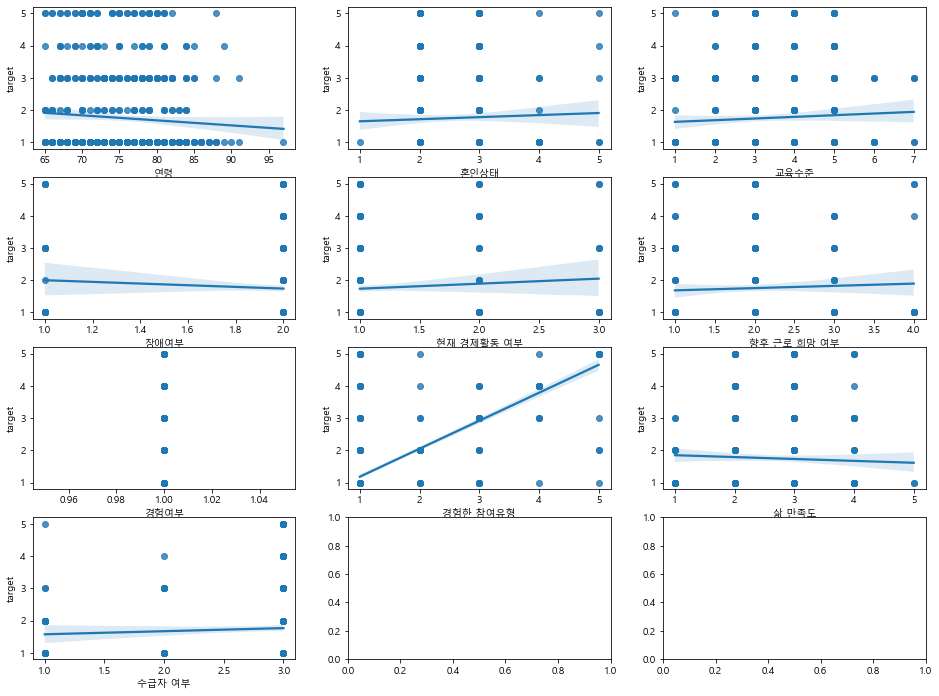

In [ ]:
_, axs = plt.subplots(4, 3, figsize=(16, 12))
for idx, feature in enumerate(senior_df.columns[:-1]):
    row, col = idx // 3, idx % 3
    sns.regplot(x=feature, y=senior_df['target'], data=senior_df, ax=axs[row][col])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
for feature in senior_df.columns[:-1]:
    lr = LinearRegression()
    X = senior_df[feature].values.reshape(-1,1)
    lr.fit(X, senior_df.target)
    score = lr.score(X, senior_df.target)
    print(f"{feature}:\t{score:.4f}")

연령:	0.0046
혼인상태:	0.0009
교육수준:	0.0020
장애여부:	0.0019
현재 경제활동 여부:	0.0019
향후 근로 희망 여부:	0.0007
경험여부:	0.0000
경험한 참여유형:	0.6663
삶 만족도:	0.0011
수급자 여부:	0.0012


#### Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X=senior_df.iloc[:,:-1]
y=senior_df.iloc[:,-1]

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

print('변환된 10차 다항식 계수 피처 : ',X_poly[0])

변환된 10차 다항식 계수 피처 :  [6.7000e+01 1.0000e+00 4.0000e+00 ... 5.9049e+04 5.9049e+04 5.9049e+04]


In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
%time lin_reg.fit(X_poly, y)
lin_reg.intercept_ , lin_reg.coef_

CPU times: total: 52.2 s
Wall time: 28.4 s


(1835.8097976860217,
 array([ 1.06193731e-07,  2.57598671e-08,  7.85295497e-08, ...,
         5.96114770e-11, -3.27505813e-12,  1.10608601e-15]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=2022
)

lin_reg.score(X_test, y_test)

0.8447500573091559

#### Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    senior_df.iloc[:,:-1], senior_df.iloc[:,-1], test_size=0.2, random_state=2022
)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# R-squared
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.6881112759930955, 0.5880832382661109)